# Dogs vs Cats v2
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
### Dog Image: 1,111개, Cat Image: 1,111개, 총 2,222개
### One-hot encoding --> Logistic Regression
### Data shuffling
### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [3]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
path='dogs-vs-cats/train/'

### Train set 만들기

In [5]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [6]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [7]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [8]:
## Load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [9]:
classes = ['dog', 'cat']

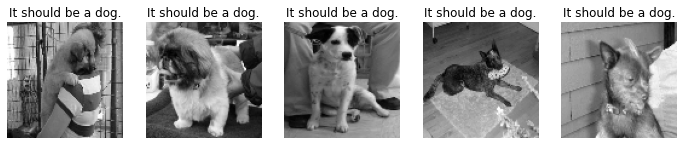

In [10]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

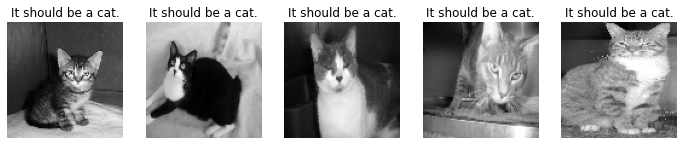

In [11]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [12]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [13]:
y_dogs[0], y_cats[0]

(1, 0)

In [14]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [15]:
X_train = np.concatenate((dogs, cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [16]:
X_train.shape, y_train.shape

((2222, 96, 96, 1), (2222,))

### Test set (dog.12*, cat.12*) 만들기

In [17]:
dogs, cats = [], []
y_dogs, y_cats = [], []

In [18]:
dog_path = os.path.join(path, 'dog.12*')
len(glob(dog_path))

611

In [19]:
## Load some our dog images (611 개 이미지)
dog_path = os.path.join(path, 'dog.12*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [20]:
## Load some our cat images (611 개 이미지)
cat_path = os.path.join(path, 'cat.12*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [21]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [22]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [23]:
dogs.shape

(611, 96, 96, 1)

In [24]:
X_test = np.concatenate((dogs, cats), axis=0)
y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [25]:
X_test.shape, y_test.shape

((1222, 96, 96, 1), (1222,))

### 모델 설정

In [26]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)       

In [27]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [28]:
## to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn2-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=10)

### 모델 학습

In [29]:
model.fit(X_train, y_train, batch_size=32, epochs=40, 
          validation_split=0.2, shuffle=True,
          callbacks=[checkpointer, early_stopping_callback])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1777/1777 [==============================] - 37s 21ms/step - loss: 0.7106 - accuracy: 0.6078 - val_loss: 0.9486 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.94864, saving model to model/dogs_vs_cats-cnn2-01-0.9486.hdf5
Epoch 2/40
1777/1777 [==============================] - 37s 21ms/step - loss: 0.6557 - accuracy: 0.6252 - val_loss: 0.8807 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss improved from 0.94864 to 0.88072, saving model to model/dogs_vs_cats-cnn2-02-0.8807.hdf5
Epoch 3/40
1777/1777 [==============================] - 37s 21ms/step - loss: 0.6558 - accuracy: 0.6275 - val_loss: 0.8690 - val_accuracy: 0.2045

Epoch 00003: val_loss improved from 0.88072 to 0.86898, saving model to model/dogs_vs_cats-cnn2-03-0.8690.hdf5
Epoch 4/40
1777/1777 [==============================] - 37s 21ms/step - loss: 0.6311 - accuracy: 0.6573 - val_loss: 0.9076 - val_accuracy: 0.1978

Epoch 00004: val_loss did no

In [30]:
from keras.models import load_model
del model
model = load_model('model/dogs_vs_cats-cnn2-05-0.7372.hdf5')

In [31]:
scores = model.evaluate(X_test, y_test, verbose=2)
print('MODEL ACCURACY: %.4f' % scores[1])

MODEL ACCURACY: 0.6219
